In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
receitas = pd.read_csv(
    '../dados/receitas_mensais_2023.csv',
    sep=";"
)

In [3]:
despesas = pd.read_csv(
    '../dados/despesas_mensais_2023.csv',
    sep=";"
)

In [4]:
receitas

,meses,valores,n
0,6,"R$ 62.409,18",43
1,7,"R$ 62.409,18",43
2,8,"R$ 57.728,49",40
3,9,"R$ 40.786,87",33
4,10,"R$ 40.786,87",33


In [5]:
despesas

,meses,valores,n
0,6,"R$58.136,22",43
1,7,"R$73.274,51",43
2,8,"R$74.271,44",40
3,9,"R$64.923,11",33
4,10,"R$55.771,65",33


In [6]:
def converter_moeda(entrada):
    saida = (
        entrada.replace('R$', '')
        .replace('.','')
        .replace(',','.')
        .replace(' ','')
    )
    return float(saida)
        

In [7]:
receitas['valores'] = receitas['valores'].map(converter_moeda)
receitas

,meses,valores,n
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


In [8]:
despesas['valores'] = despesas['valores'].map(converter_moeda)
despesas

,meses,valores,n
0,6,58136.22,43
1,7,73274.51,43
2,8,74271.44,40
3,9,64923.11,33
4,10,55771.65,33


In [9]:
saldo = receitas.copy()
saldo.columns = ['meses', 'receitas', 'n']
saldo['despesas'] = despesas['valores']
saldo['saldo'] = saldo['receitas']-saldo['despesas']

In [10]:
saldo

,meses,receitas,n,despesas,saldo
0,6,62409.18,43,58136.22,4272.96
1,7,62409.18,43,73274.51,-10865.33
2,8,57728.49,40,74271.44,-16542.95
3,9,40786.87,33,64923.11,-24136.24
4,10,40786.87,33,55771.65,-14984.78


In [11]:
 # prejuízo acumulado
saldo[saldo['saldo']<0]['saldo'].sum()

-66529.29999999999

In [12]:
alunos = pd.read_csv(
    '../dados/alunos_ago.csv',
    sep=";"
)
alunos

,horas,valor
0,4,"1.130,37"
1,4,"964,3248503"
2,4,"964,885101"
3,4,"992,3709998"
4,4,"1.173,91"
5,4,"1023,957934"
6,4,0
7,5,"1.137,17"
8,6,"1.144,53"
9,6,"1.115,85"


In [13]:
alunos['horas'] = alunos['horas'].map(converter_moeda)
alunos['valor'] = alunos['valor'].map(converter_moeda)
alunos

,horas,valor
0,4.0,1130.370000
1,4.0,964.324850
2,4.0,964.885101
3,4.0,992.371000
4,4.0,1173.910000
5,4.0,1023.957934
6,4.0,0.000000
7,5.0,1137.170000
8,6.0,1144.530000
9,6.0,1115.850000


In [14]:
plano = pd.read_csv('../dados/plano_mensalidades_2023.csv',
                   sep=';')
plano.dtypes

horas       int64
valores    object
dtype: object

In [15]:
plano

,horas,valores
0,4,"R$ 1.339,58"
1,6,"R$ 1.666,43"
2,8,"R$ 1.874,48"
3,10,"R$ 2.314,47"
4,12,"R$ 2.684,79"


In [16]:
plano['valores'] = plano['valores'].map(converter_moeda)
plano

,horas,valores
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [17]:
plano.rename(columns={'valores': "valores_tabelados"})

,horas,valores_tabelados
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [18]:
plano['horas'] = plano['horas'].astype(float)
plano.dtypes

horas      float64
valores    float64
dtype: object

In [19]:
comp = alunos.merge(plano, left_on='horas', right_on='horas', how='left')

In [20]:
comp = comp.set_index('horas')

In [21]:
comp = comp.interpolate(method='index')

In [22]:
comp

,valor,valores
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [23]:
comp = comp.rename(columns={'valor':'pago' ,'valores':'tabelado'})

In [24]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [25]:
comp = comp[comp['pago'] != 0]

In [26]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300
6.0,1115.850000,1666.4300


In [27]:
5*comp['tabelado'].sum()-despesas['valores'].sum()

52084.95749999996

In [28]:
receitas

,meses,valores,n
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


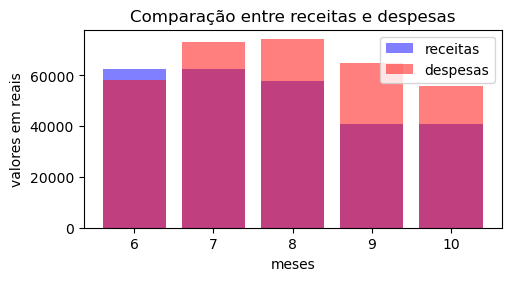

In [29]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

meses = ['jun', 'jul', 'ago', 'set', 'out']

ax.bar(
    receitas['meses'],
    receitas['valores'],
    label='receitas',
    color='blue',
    alpha=0.5,
)

ax.bar(
    despesas['meses'],
    despesas['valores'],
    label='despesas',
    color='red',
    alpha=0.5,
)

ax.set_xlabel('meses')  
ax.set_ylabel('valores em reais')  

ax.set_title('Comparação entre receitas e despesas') 
ax.legend()

In [30]:
# cálculo da mensalidade tabelada média
comp['tabelado'].mean()

2045.7399324324322

In [31]:
# cálculo da mensalidade paga média
comp['pago'].mean()

1560.2353752729728

In [32]:
receitas['tabelado'] = [
                        comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),  # mes 6 - 43
                        comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),  # mes 7 - 43
                        comp['tabelado'].sum(),                            # mes 8 - 40
                        comp['tabelado'].sum()-10*comp['tabelado'].mean(), # mes 9 - 33
                        comp['tabelado'].sum()-10*comp['tabelado'].mean() # mes 10 - 33666
                        ] 

In [33]:
receitas

,meses,valores,n,tabelado
0,6,62409.18,43,81829.597297
1,7,62409.18,43,81829.597297
2,8,57728.49,40,75692.377500
3,9,40786.87,33,55234.978176
4,10,40786.87,33,55234.978176


In [34]:
# soma da receitas possíveis
receitas['tabelado'].sum()

349821.5284459459

In [35]:
# soma das despesas
despesas['valores'].sum()

326376.93

In [36]:
# soma da receitas reais
receitas['valores'].sum()

264120.59

In [37]:
# prejuízo real dos 5 meses
prejuizo_real = receitas['valores'].sum()-despesas['valores'].sum()
prejuizo_real

-62256.33999999997

In [38]:
# lucro possível dos 5 meses
lucro_possivel = receitas['tabelado'].sum()-despesas['valores'].sum()
lucro_possivel

23444.598445945885

In [39]:
# media das despesas por aluno
despesa_media = despesas['valores'].sum()/despesas['n'].sum()
despesa_media

1699.87984375

In [40]:
# media das mensalidades pagas por aluno
mensalidade_media = receitas['valores'].sum()/receitas['n'].sum()
mensalidade_media

1375.6280729166667

In [41]:
# media das mensalidades tabeladas por aluno
mensalidade_media_tabelada = receitas['tabelado'].sum()/receitas['n'].sum()
mensalidade_media_tabelada

1821.9871273226347

In [42]:
# prejuízo médio por por aluno por mês
mensalidade_media-despesa_media

-324.25177083333324

In [43]:
# lucro possível médio por por aluno por mês
mensalidade_media_tabelada-despesa_media

122.10728357263474

In [44]:
prolabore = 8000

In [45]:
# calculo do ponto de equilibrio - pior cenário de despesas
(  ( despesas['valores'].sum() -5* prolabore) /   (receitas['valores'].sum() / receitas['n'].sum() )    )   /5

41.635807764930405

In [46]:
# calculo do ponto de equilibrio - melhor cenário de despesas
(  ( (despesas['valores'][0]+despesas['valores'][4]) -2* prolabore) /   ( (receitas['valores'][0] + receitas['valores'][4]) / receitas['n'].sum() )    )   /5

36.43222979949329

In [47]:
# calculo do ponto de equilibrio - pior cenário de despesas e melhor de receitas
((   (despesas['valores'].sum()-5* prolabore) )/   (receitas['tabelado'].sum() / receitas['n'].sum() )    )   /5

31.435669956771193

In [48]:
# calculo do ponto de equilibrio - melhor cenário de  e receitas
(  ( (despesas['valores'][0]+despesas['valores'][4]-2* prolabore) )/   ( (receitas['tabelado'][0] + receitas['tabelado'][4]) / receitas['n'].sum() )    )   /5

27.429860669880735

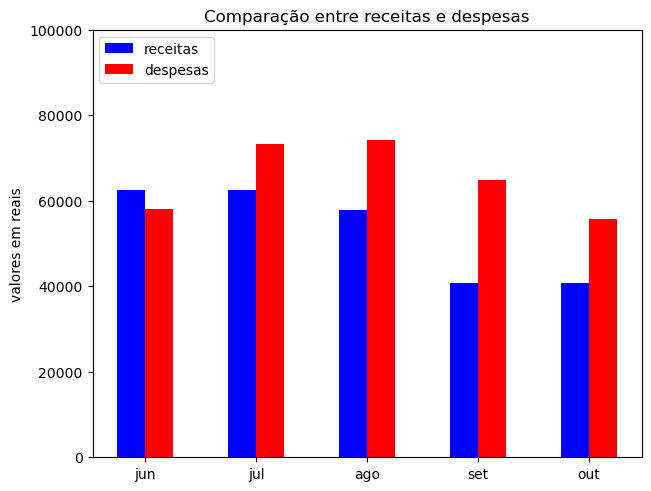

In [50]:
meses = ('jun', 'jul', 'ago', 'set', 'out')
receitas_e_despesas = {
    'receitas': receitas['valores'],
    'despesas': despesas['valores'],
}

cores = {'receitas': 'blue', 'despesas': 'red'}

x = np.arange(len(meses))
largura = 0.25
passo = 0.5

fig, ax = plt.subplots(layout='constrained')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 100000)

ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/comparacao.png')

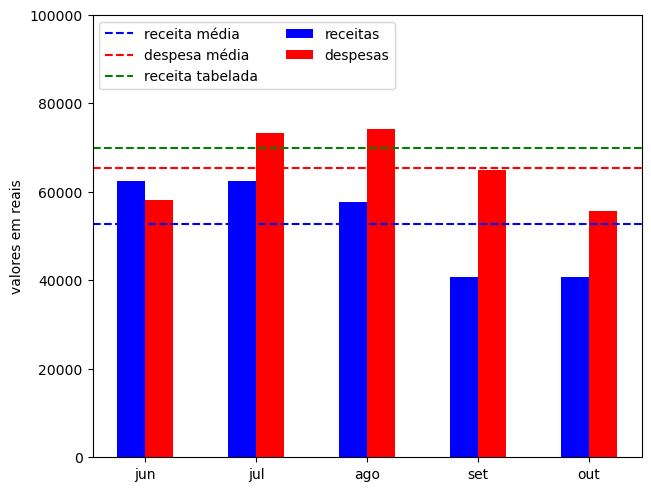

In [51]:
meses = ('jun', 'jul', 'ago', 'set', 'out')
receitas_e_despesas = {
    'receitas': receitas['valores'],
    'despesas': despesas['valores'],
}

cores = {'receitas': 'blue', 'despesas': 'red'}

x = np.arange(len(meses))
largura = 0.25
passo = 0.5

fig, ax = plt.subplots(layout='constrained')

ax.axhline(receitas['valores'].mean(), color='blue', linestyle='dashed', label='receita média')
ax.axhline(despesas['valores'].mean(), color='red', linestyle='dashed', label='despesa média')
ax.axhline(receitas['tabelado'].mean(), color='green', linestyle='dashed', label='receita tabelada')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
# ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 100000)

ax.legend(loc='upper left', ncols=2)

fig.savefig('../imagens/comparacao-medias.png')